<a href="https://colab.research.google.com/github/pareeya555/cs352-264-s0716/blob/main/Copy_of_CRISP_DM_Template_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study - Titanic


## Table of Contents


[**Step 1: Business Understanding**](#Step-1:-Business-Understanding)

[**Step 2: Data Understanding**](#Step-2:-Data-Understanding)

- [**Load Data**](#Load-Data)
- [**Check Data Quality**](#Check-Data-Quality)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)
 
[**Step 3: Data Preparation**](#Step-3:-Data-Preparation)
- [**Deal with Missing Data**](#Deal-with-Missing-Data)
- [**Feature Engineering**](#Feature-Engineering)

[**Step 4: Modeling**](#Step-4:-Modeling)


[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding
This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives.
#### Titanic Story
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class passengers.

#### Objective
In this challenge, we will complete the analysis of what sorts of people were likely to survive. 

In addition, we will build a regression model to predict ticket price(Fare).



[Back to Top](#Table-of-Contents)

## Step 2: Data Understanding
The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information. This step is often mixed with the next step, Data Preparation.

### Data Dictionary
The data is in a csv file titanic.csv. 

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | male/femail |	
| Age | Age | in years |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**
- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
 - Parent = mother, father
 - Child = daughter, son, stepdaughter, stepson
 - Some children travelled only with a nanny, therefore parch=0 for them.



In [2]:
#import important functions 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load Data

This dataset is in titanic.csv. Make sure the file is in current folder. Please download the file from [here](https://drive.google.com/file/d/1oSXdKZF22H8sHhe2klN63PSNDYGjcT3q/view?usp=sharing) if you haven't done so yet.

In [3]:
!wget --no-check-certificate 'http://doc.google.com/uc?export=doenload&id=1oSXdKZF22H8sHhe2klN63PSNDYGjcT3q' -O titanic.csv
df_titanic = pd.read_csv( 'titanic.csv' ,delimiter = ',')
df_titanic

--2022-03-24 05:54:23--  http://doc.google.com/uc?export=doenload&id=1oSXdKZF22H8sHhe2klN63PSNDYGjcT3q
Resolving doc.google.com (doc.google.com)... 172.217.212.101, 172.217.212.139, 172.217.212.102, ...
Connecting to doc.google.com (doc.google.com)|172.217.212.101|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://docs.google.com/uc?export=doenload&id=1oSXdKZF22H8sHhe2klN63PSNDYGjcT3q [following]
--2022-03-24 05:54:23--  http://docs.google.com/uc?export=doenload&id=1oSXdKZF22H8sHhe2klN63PSNDYGjcT3q
Resolving docs.google.com (docs.google.com)... 142.251.6.113, 142.251.6.139, 142.251.6.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.6.113|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://docs.google.com/uc?export=doenload&id=1oSXdKZF22H8sHhe2klN63PSNDYGjcT3q [following]
--2022-03-24 05:54:23--  https://docs.google.com/uc?export=doenload&id=1oSXdKZF22H8sHhe2klN63PSNDYGjcT3q
Conne

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,$13.0,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,$30.0,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,$23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,$30.0,C148,C


### Check Data Quality
Check data quality. Most common check is to check missing values. We can do some basic data cleaning like cleaning up currency field.
- Check null values
- Currency field need to be converted to float, remove '$' or ',', sometimes negative value is enclosed in ()


##### Task1: Check out Basic Dataframe Info

Hint: info() function.

Check for missing values in the dataframe.

In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


##### Task2: Clean up Fare, Convert to Float
Strip "$" from Fare, convert datatype to float.

In [5]:
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

df_titanic['Fare'] = df_titanic['Fare'].apply(clean_currency).astype('float')
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##### Task3: Check out statistics of Numeric Columns

Hint:describe() function.

Discuss:
- Age, SibSp, Parch, Fare statistics
- What does mean Survived mean?

In [6]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Exploratory Data Analysis - EDA
EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

#### Types Of Features
##### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex,Embarked.

##### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Fare

### Categorical Features
We will analysis Survived as univariant. Relationship between Sex and Survival, Embarked and Survivval.

#### How many survived
Bar chart on Survived column. There are multiple ways to do the bar chart. We will demonstrate 2 ways here, seaborn countplot and pandas series bar.

##### Task4: Plot bar chart for Perished vs. Survived
Plot bar chart for Survived column. Survived=0 means perished, Survived=1 means Survived.

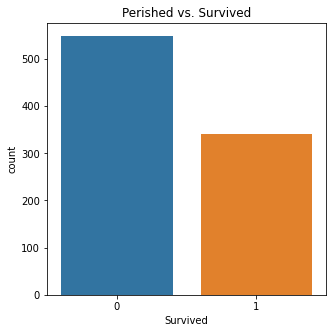

In [7]:
f,ax=plt.subplots(figsize=(5,5))
sns.countplot('Survived',data=df_titanic,ax=ax)
ax.set_title('Perished vs. Survived')
plt.show()

#### Relationship between Sex and Survival
We may use aggregation function or plot.

Next 2 cells demonstate aggregate function.

The following cell demonstrates bar plot and countplot.


##### Task5: Plot Bar Chart on Number of Male and Femal Passengers

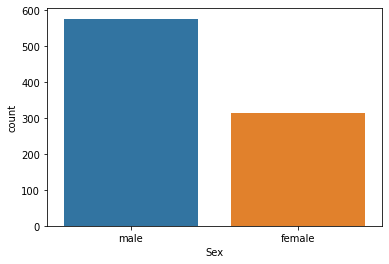

In [8]:
sns.countplot('Sex',data=df_titanic)
plt.show()

##### Task6: Groupby Sex to Find Survival Rate of Male and Female

In [9]:
df_titanic.groupby(['Sex']).agg({"Survived":"mean"})

,Survived
Sex,
female,0.742038
male,0.188908


##### Task7: Plot Perished vs. Survived Bar for Male and Femail
We will use seaborn countplot() again, but set argument `hue` to 'Survived'.

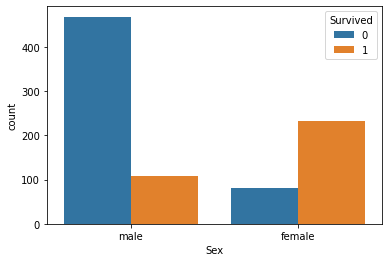

In [10]:
ax = sns.countplot(x= "Sex", hue= "Survived", data=df_titanic)

The number of men on the ship is lot more than the number of women. Still the number of survived women is almost twice the number of survived males. Majority women survived while vast majority of men perished.

#### Pclass and Survival
##### Task 8: List survival rate of each Pclass 

In [11]:
df_titanic.groupby(['Pclass']).agg({"Survived":"mean"})

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


##### Task 9: Plot Perished vs. Survived for each Pclass

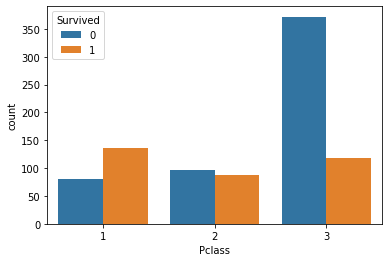

In [12]:
ax = sns.countplot(x= "Pclass", hue= "Survived", data=df_titanic)

### Continuous Features


#### Univariate Distribution Plot
There are multiple ways to do histogram. I will demonstrate 3 ways.
- ax.hist(): can not handle NnN value
- seaborn.distplot(): can not handle NaN. Has KDE(kernel density estimation) by default.
- pd.Sereis.hist(): simplest and can handle NaN by default

##### Task 10: Plot histogram for Age
Use pandas Series hist() function which handles missing value.

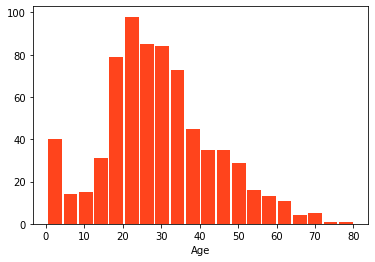

In [13]:
plt.hist(df_titanic['Age'],bins=20,rwidth=0.9,color='#FF441C')
plt.xlabel('Age')
plt.show()

##### Task11: Stack age histogram of survived on top of overall age histogram
Plot histogram for Age, then filter out survived passenger and plot histogram for Age on same axis. Set different color and label.

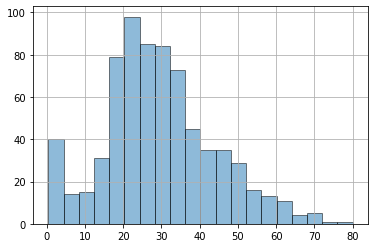

In [14]:
fig, ax = plt.subplots()
df_titanic.Age.hist(ax=ax, bins=20, edgecolor='black', alpha=0.5)

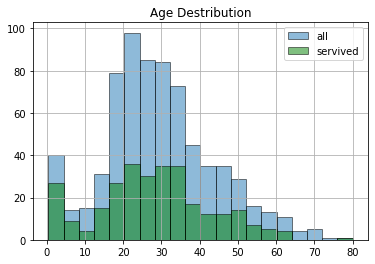

In [15]:
fig, ax = plt.subplots()
df_titanic.Age.hist(ax=ax, label='all', bins=20, edgecolor='black', alpha=0.5)
df_titanic[df_titanic.Survived==1].Age.hist(ax=ax, bins=20, color='g', label='servived', edgecolor='black', alpha=0.5)
ax.set_title('Age Destribution')
ax.legend()

Children have higher survival rate.

[Back to Top](#Table-of-Contents)

## Step 3: Data Preparation
Create new features through feature engineering; Deal with missing values; Clean up data, ie. strip extra white spaces in string values. We will focus on dealing with missing data in this phrase.

In [16]:
#check all missing data
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Deal with Missing Data
We will demonstrate filling with mean/mode and estimate from other columns.

#### Fill with Mean/Mode
Embarked only has 2 missing values and there is no obvious way to estimate the missing walue, we will simply fill it with mode of the column, or 'S'

##### Task12: Fill missing Embarked with mode

In [17]:
df_titanic['Embarked']=df_titanic['Embarked'].apply(str).str.replace( 'S' , ' ' )
df_titanic['Embarked']=df_titanic.Fare.astype(str)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,7.25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,7.925
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,53.1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,8.05
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,13.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,30.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,23.45
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,30.0


#### Fill with Estimated Value

A title is a word used in a person's name, in certain contexts. It may signify either veneration, an official position, or a professional or academic qualification. It's a good indication of age, for example, Mr is for adult man, Master is for young boys.

If we look at all names of Titanic passengers, we can see that the name is in format Last, Title. First. We can use this information to estimate missing ages.

- First, we will use regular expression to extract title from name.
- Then we will convert title to upper case.
- Then we fill missing age with mean age of specific title.

In [18]:
#extract prefix from name
df_titanic['Title']=df_titanic.Name.str.extract('([A-Za-z]+\.)')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,7.25,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,71.2833,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,7.925,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,53.1,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,8.05,Mr.


##### Task13: convert title to upper case.
To ensure we get accurate mean age of each initial, we convert initial to all upper case.

In [19]:
df_titanic['Title']= df_titanic['Title'].str.upper()
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,7.25,MR.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,71.2833,MRS.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,7.925,MISS.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,53.1,MRS.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,8.05,MR.


##### Task14: Fill missing age with mean age of the title

In [20]:
df_titanic['Age']=df_titanic['Title'].apply(str).str.replace( '0' , ' ' )
df_titanic['Age']=df_titanic.Fare.astype(float)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,7.2500,1,0,A/5 21171,7.2500,NaN,7.25,MR.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,71.2833,1,0,PC 17599,71.2833,C85,71.2833,MRS.
2,3,1,3,"Heikkinen, Miss. Laina",female,7.9250,0,0,STON/O2. 3101282,7.9250,NaN,7.925,MISS.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,53.1000,1,0,113803,53.1000,C123,53.1,MRS.
4,5,0,3,"Allen, Mr. William Henry",male,8.0500,0,0,373450,8.0500,NaN,8.05,MR.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,13.0000,0,0,211536,13.0000,NaN,13.0,REV.
887,888,1,1,"Graham, Miss. Margaret Edith",female,30.0000,0,0,112053,30.0000,B42,30.0,MISS.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.4500,1,2,W./C. 6607,23.4500,NaN,23.45,MISS.
889,890,1,1,"Behr, Mr. Karl Howell",male,30.0000,0,0,111369,30.0000,C148,30.0,MR.


### Feature Engineering
We'll create a new column FamilySize. There are 2 columns related to family size, parch indicates parent or children number, Sibsp indicates sibling and spouse number.

Take one name 'Asplund' as example, we can see that total family size is 7(Parch + SibSp + 1), and each family member has same Fare, which means the Fare is for the whole group. So family size will be an important feature to predict Fare. There're only 4 Asplunds out of 7 in the dataset becasue the dataset is only a subset of all passengers.

In [21]:
df_titanic[df_titanic.Name.str.contains('Asplund')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,31.3875,1,5,347077,31.3875,NaN,31.3875,MRS.
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,31.3875,4,2,347077,31.3875,NaN,31.3875,MASTER.
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,31.3875,4,2,347077,31.3875,NaN,31.3875,MISS.
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,31.3875,4,2,347077,31.3875,NaN,31.3875,MASTER.


##### Task15: Create column 'FamilySize'
FamilySize = Parch + SibSp + 1

In [22]:
df_titanic['FamilySize'] = df_titanic['Parch'] + df_titanic['SibSp'] + 1
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,7.2500,1,0,A/5 21171,7.2500,NaN,7.25,MR.,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,71.2833,1,0,PC 17599,71.2833,C85,71.2833,MRS.,2
2,3,1,3,"Heikkinen, Miss. Laina",female,7.9250,0,0,STON/O2. 3101282,7.9250,NaN,7.925,MISS.,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,53.1000,1,0,113803,53.1000,C123,53.1,MRS.,2
4,5,0,3,"Allen, Mr. William Henry",male,8.0500,0,0,373450,8.0500,NaN,8.05,MR.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,13.0000,0,0,211536,13.0000,NaN,13.0,REV.,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,30.0000,0,0,112053,30.0000,B42,30.0,MISS.,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.4500,1,2,W./C. 6607,23.4500,NaN,23.45,MISS.,4
889,890,1,1,"Behr, Mr. Karl Howell",male,30.0000,0,0,111369,30.0000,C148,30.0,MR.,1


[Back to Top](#Table-of-Contents)

## Step 4: Modeling

Now we have a relatively clean dataset(Except for Cabin column which has many missing values). We can do a classification on Survived to predict whether a passenger could survive the desaster or a regression on Fare to predict ticket fare. This dataset is not a good dataset for regression. But since we don't talk about classification in this workshop we will construct a linear regression on Fare in this exercise.

##### Task16: Contruct a regresson on Fare
Construct regression model with statsmodels.

Pick Pclass, Embarked, FamilySize as independent variables.

In [23]:
import statsmodels.formula.api as smf